In [1]:
import numpy as np
import pandas as pd
import datetime
import time
import regex as re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.decomposition import PCA
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [2]:
reviews = pd.read_csv('./yelp_reviews.csv')

In [3]:
reviews.head()

,business_id,stars,useful,funny,cool,text
0,--1UhMGODdWsrMastO9DZw,5,0,0,0,I just love this little Mexican cafeteria-styl...
1,--1UhMGODdWsrMastO9DZw,3,0,0,0,"We got guacamole, both the vegetarian tacos (R..."
2,--1UhMGODdWsrMastO9DZw,4,0,0,1,Downtown west which honestly feels like Downto...
3,--1UhMGODdWsrMastO9DZw,5,0,0,0,Glad these guys moved in on the block! It's qu...
4,--1UhMGODdWsrMastO9DZw,5,2,1,2,Fantastic spot for lunch with great value for ...


In [4]:
trim_df = reviews

In [5]:
trim_df.drop(columns=['stars', 'useful', 'funny', 'cool'], inplace=True)

In [6]:
trim_df

,business_id,text
0,--1UhMGODdWsrMastO9DZw,I just love this little Mexican cafeteria-styl...
1,--1UhMGODdWsrMastO9DZw,"We got guacamole, both the vegetarian tacos (R..."
2,--1UhMGODdWsrMastO9DZw,Downtown west which honestly feels like Downto...
3,--1UhMGODdWsrMastO9DZw,Glad these guys moved in on the block! It's qu...
4,--1UhMGODdWsrMastO9DZw,Fantastic spot for lunch with great value for ...
...,...,...
5056222,zzzaIBwimxVej4tY6qFOUQ,"After reading all these good reviews, I was pr..."
5056223,zzzaIBwimxVej4tY6qFOUQ,This place is very good. At first i thought it...
5056224,zzzaIBwimxVej4tY6qFOUQ,Guthrie's is a great choice for people who are...
5056225,zzzaIBwimxVej4tY6qFOUQ,"This location used to be a KFC, I went there o..."


In [7]:
reviews.groupby(['business_id']).count()
#Grouping by business.

,text
business_id,
--1UhMGODdWsrMastO9DZw,29
--6MefnULPED_I942VcFNA,57
--9e1ONYQuAa-CB_Rrw7Tw,1816
--DaPTJW3-tB1vP-PfdTEg,51
--FBCX-N37CMYDfs790Bnw,174
...,...
zzsU528uoRB6qZUGhKDa6w,7
zzvlwkcNR1CCqOPXwuvz2A,7
zzwhN7x37nyjP0ZM8oiHmw,78


In [27]:
agg_df = trim_df.groupby('business_id')['text'].apply(','.join)

In [24]:
trim_df.dropna(inplace=True)
#dropping any NAs just in case.  

In [28]:
agg_df

business_id
--1UhMGODdWsrMastO9DZw    I just love this little Mexican cafeteria-styl...
--6MefnULPED_I942VcFNA    Great selection of authentic Chinese dishes. T...
--9e1ONYQuAa-CB_Rrw7Tw    Lissa G and I stopped in for lunch.  We've bee...
--DaPTJW3-tB1vP-PfdTEg    3.5 stars.  Fast basic breakfast. Good value. ...
--FBCX-N37CMYDfs790Bnw    I just ordered lemonade and it cost me $5.50! ...
                                                ...                        
zzsU528uoRB6qZUGhKDa6w    Boring!  This underground layer is almost spoo...
zzvlwkcNR1CCqOPXwuvz2A    $11 dollars (after tax) for a "Special Pork Sa...
zzwhN7x37nyjP0ZM8oiHmw    Had a lovely summer dinner on the patio. Great...
zzwicjPC9g246MK2M1ZFBA    Ordered fish & chips......steamed broccoli was...
zzzaIBwimxVej4tY6qFOUQ    Guthrie's recently replaced the KFC near where...
Name: text, Length: 63961, dtype: object

In [31]:
agg_df = pd.DataFrame(agg_df)
#Converting to a pandas dataframe.  

In [38]:
agg_reviews = agg_df

In [49]:
agg_reviews.reset_index(inplace=True)

In [50]:
agg_reviews

,business_id,text
0,--1UhMGODdWsrMastO9DZw,I just love this little Mexican cafeteria-styl...
1,--6MefnULPED_I942VcFNA,Great selection of authentic Chinese dishes. T...
2,--9e1ONYQuAa-CB_Rrw7Tw,Lissa G and I stopped in for lunch. We've bee...
3,--DaPTJW3-tB1vP-PfdTEg,3.5 stars. Fast basic breakfast. Good value. ...
4,--FBCX-N37CMYDfs790Bnw,I just ordered lemonade and it cost me $5.50! ...
...,...,...
63956,zzsU528uoRB6qZUGhKDa6w,Boring! This underground layer is almost spoo...
63957,zzvlwkcNR1CCqOPXwuvz2A,"$11 dollars (after tax) for a ""Special Pork Sa..."
63958,zzwhN7x37nyjP0ZM8oiHmw,Had a lovely summer dinner on the patio. Great...
63959,zzwicjPC9g246MK2M1ZFBA,Ordered fish & chips......steamed broccoli was...


In [51]:
agg_reviews.to_csv('./agg_reviews.csv', index=False)

In [2]:
df = vaex.from_csv('./agg_reviews.csv', convert=True, copy_index=True)
#reading in data as vaex format

In [3]:
df.head(2)

#,text
<i style='opacity: 0.6'>0</i>,'I just love this little Mexican cafeteria-style...
<i style='opacity: 0.6'>1</i>,'Great selection of authentic Chinese dishes. Th...


In [4]:
df['polarity'] = df['text'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment.polarity).values[0])
#getting sentiment values from TextBlob

In [5]:
df['subjectivity'] = df['text'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment.subjectivity).values[0])
#Getting sentiment values from TextBlob

In [6]:
df.drop(columns=['text'], inplace=True)

#,polarity,subjectivity
<i style='opacity: 0.6'>0</i>,0.22018465452675978,0.5297412928714867
<i style='opacity: 0.6'>1</i>,0.1428557736412659,0.5075342715981854
<i style='opacity: 0.6'>2</i>,0.2804095386796256,0.5724454691881081
<i style='opacity: 0.6'>3</i>,0.23261230632175287,0.5416237446819512
<i style='opacity: 0.6'>4</i>,0.27488195409325383,0.5726932152664499
...,...,...
"<i style='opacity: 0.6'>63,956</i>",0.13247428553830995,0.5843493735262028
"<i style='opacity: 0.6'>63,957</i>",0.12684422921711058,0.5180605740775232
"<i style='opacity: 0.6'>63,958</i>",0.2853763313525951,0.5561469125305006
"<i style='opacity: 0.6'>63,959</i>",0.15423861195698543,0.5642063296604544


In [ ]:
#df.export_csv('./sentiment_scores.csv', progress=.10, chunk_size=10000)
#Trying to export the vaex data.  

In [49]:
scores = pd.read_csv('sentiment_scores.csv')
#reading back in as pandas. 

In [3]:
scores

,polarity,subjectivity
0,0.220185,0.529741
1,0.142856,0.507534
2,0.280410,0.572445
3,0.232612,0.541624
4,0.274882,0.572693
...,...,...
49995,0.213653,0.560277
49996,0.163705,0.527546
49997,0.256801,0.551771
49998,0.240501,0.493089


In [4]:
restaurants = pd.read_csv('yelp_restaurants.csv')

In [5]:
restaurants

,business_id,name,city,state,stars,review_count,is_open,categories,total_stars,total_useful,total_funny,total_cool
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,Calgary,AB,4.0,27,1,"Restaurants, Mexican",118,20,1,16
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,Richmond Hill,ON,3.0,55,1,"Chinese, Restaurants",164,95,31,36
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,Las Vegas,NV,4.0,1759,1,"Seafood, Cajun/Creole, Restaurants, Steakhouses",7478,1970,1001,1340
3,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,Toronto,ON,4.0,51,1,"Restaurants, Breakfast & Brunch",192,18,3,10
4,--FBCX-N37CMYDfs790Bnw,The Bar At Bermuda & St. Rose,Henderson,NV,4.0,166,1,"American (New), Nightlife, Beer, Wine & Spirit...",672,138,63,100
...,...,...,...,...,...,...,...,...,...,...,...,...
63956,zzsU528uoRB6qZUGhKDa6w,Joni's Capitol Cafe,Phoenix,AZ,4.0,7,0,"Sandwiches, Breakfast & Brunch, Restaurants",28,19,15,15
63957,zzvlwkcNR1CCqOPXwuvz2A,7 Dim Sum,Toronto,ON,3.5,6,0,"Chinese, Asian Fusion, Dim Sum, Restaurants, V...",24,4,0,1
63958,zzwhN7x37nyjP0ZM8oiHmw,Carmody's Grille,Pittsburgh,PA,4.0,75,1,"American (New), Restaurants",325,62,10,31
63959,zzwicjPC9g246MK2M1ZFBA,Sizzler,Mesa,AZ,3.0,81,1,"Buffets, Salad, American (Traditional), Seafoo...",251,129,42,43


In [6]:
restaurants.drop(restaurants.index[50000:63961], inplace=True)
#Vaex only exported 50,000 rows, so I'm trimming the business data to match.  

In [7]:
restaurants.head(2)

,business_id,name,city,state,stars,review_count,is_open,categories,total_stars,total_useful,total_funny,total_cool
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,Calgary,AB,4.0,27,1,"Restaurants, Mexican",118,20,1,16
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,Richmond Hill,ON,3.0,55,1,"Chinese, Restaurants",164,95,31,36


In [8]:
scores.head(2)

,polarity,subjectivity
0,0.220185,0.529741
1,0.142856,0.507534


In [9]:
df = restaurants.merge(scores, left_index=True, right_index=True)
#merging my dataframes.  

In [6]:
df_wtext = pd.read_csv('./final_yelp_data.csv')

In [77]:
df_wtext.tail()

,business_id,name,city,state,stars,review_count,is_open,categories,total_stars,total_useful,total_funny,total_cool,polarity,subjectivity,text
49995,lyIHmlIK7PKwQeGyR8svJQ,Cafe Crepe,Toronto,ON,3.5,338,1,"Food, Coffee & Tea, Restaurants, Creperies, Br...",1280,287,106,188,0.213653,0.560277,Cafe Crepe is almost always crowded but I'd sa...
49996,lyT7-grqNhAvll39V7kzag,Apollo Cafe,Phoenix,AZ,3.0,9,0,"Restaurants, Buffets",33,13,7,7,0.163705,0.527546,Used to be much better. A little pricey but if...
49997,lyTIuSgPdyRMx3l7xPzl3A,El Entronke Mexican Food,Phoenix,AZ,4.0,14,0,"Restaurants, Mexican",58,17,10,7,0.256801,0.551771,:) good food :) good service and better then p...
49998,lyX-_zyEHDYNodWL-ZXlnQ,The Greek Freak,Ajax,ON,4.0,41,1,"Restaurants, Greek",169,8,2,5,0.240501,0.493089,I've been here a handfull of times and each ti...
49999,lyg_0ArnX4fXed1cqCDAWA,Papa John's Pizza,Concord,NC,3.0,6,1,"Pizza, Restaurants, Italian",18,6,0,1,-0.028335,0.635673,Only had one delivery driver and pizza took WA...


In [79]:
y_train.mean()

0.68672

In [71]:
X = df_wtext.drop(columns = ['business_id', 'name', 'city', 'state', 'categories', 'is_open', 'text', 'total_stars'])
y = df_wtext['is_open']
#setting up X and y columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#training a no frills, logistic regression model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
lr.score(X_train, y_train)
#score of .685, not awesome.

0.68536

In [74]:
lr.score(X_test, y_test)

0.68648

In [52]:
#scaling my data for PCA
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit(X_test)

Below, I am going to run PCA with 'full' solver parameters to create interaction columns for all columns.  

In [53]:
# Instantiate PCA
pca = PCA(svd_solver='full', random_state=42)

pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='full', tol=0.0, whiten=False)

In [89]:
Z_train = pca.transform(X_train_sc)

In [90]:
Z_train

array([[-1.24893798e+02,  2.84104908e+01,  4.11158500e+00, ...,
         3.22117538e+00,  1.32501790e+00, -8.30790852e-01],
       [-1.24918792e+02,  2.83949721e+01,  4.05875349e+00, ...,
         4.03770658e+00, -9.03432719e-01,  1.30059349e+00],
       [-1.24689416e+02,  2.83167280e+01,  4.11171753e+00, ...,
         1.95946636e+00,  1.59400562e+00, -9.85111140e-02],
       ...,
       [-1.24970373e+02,  2.84234015e+01,  4.09912893e+00, ...,
         3.27758188e+00,  6.52398512e-01,  1.12978063e+00],
       [-1.24904712e+02,  2.83843169e+01,  4.08143929e+00, ...,
         3.98964301e+00, -3.78726859e-01,  1.23636290e+00],
       [-1.24934891e+02,  2.84257915e+01,  4.10664281e+00, ...,
         2.70365520e+00,  1.63913658e-01,  1.61579669e+00]])

In [91]:
pd.DataFrame(Z_train).describe()


,0,1,2,3,4,5,6
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,-124.422389,28.256668,4.085330,-5.928933,3.411604,0.034738,0.514297
std,1.786479,0.727015,0.276756,0.451409,1.071632,0.987746,0.935801
min,-124.981221,10.131284,-16.572491,-39.955554,0.886438,-5.337906,-10.435557
25%,-124.937763,28.273730,4.053827,-5.893672,2.662798,-0.537641,0.056121
50%,-124.834486,28.382960,4.087710,-5.843067,3.322794,0.102967,0.512344
75%,-124.500935,28.417046,4.106254,-5.829050,4.004835,0.657822,0.989831
max,26.726976,134.289572,23.076598,-0.494101,6.917672,10.689062,13.090872


In [92]:
Z_test = pca.transform(X_test)


In [93]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20],3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20],3)}')
#I don't have 20 components in the model, but just for good measure.  

Explained variance (first 20 components): [0.871 0.11  0.013 0.006 0.    0.    0.   ]

Cumulative explained variance (first 20 components): [0.871 0.981 0.994 1.    1.    1.    1.   ]


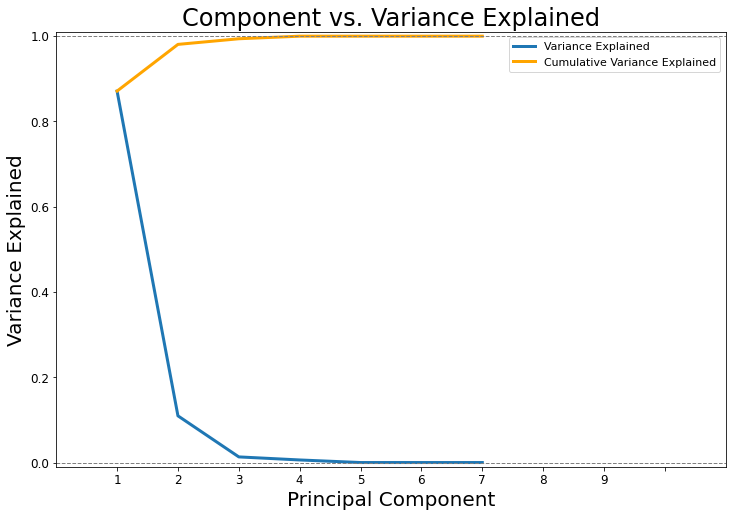

In [94]:

# Plot the variance explained (and cumulative variance explained).

# Set figure size.
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,10])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 10), range(1, 10), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);
#Plotting explained variance

In [97]:
pca = PCA(n_components = 7, svd_solver='full', random_state = 42)

# Fit PCA to training data.
pca.fit(X_train_sc)
#Fitting model with 7 components

PCA(copy=True, iterated_power='auto', n_components=7, random_state=42,
    svd_solver='full', tol=0.0, whiten=False)

In [98]:
lr = LogisticRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Fit on Z_train.
lr.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lr.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lr.score(Z_test, y_test),4)}')
#No improvement to score.  

Training Score: 0.6854
Testing Score: 0.6865


In [70]:
df_wtext['is_open'].mean()

0.68708

Now I will use tfidf to use natural language processing on my model.

In [28]:
reviews = pd.read_csv('./agg_reviews.csv')

In [29]:
reviews.shape

(63961, 2)

In [30]:
reviews.drop(reviews.index[50000:63961], inplace=True)

In [31]:
df_wtext = df.merge(reviews, left_on=['business_id'], right_on=['business_id'])

In [33]:
df_wtext.head(2)

,business_id,name,city,state,stars,review_count,is_open,categories,total_stars,total_useful,total_funny,total_cool,polarity,subjectivity,text
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,Calgary,AB,4.0,27,1,"Restaurants, Mexican",118,20,1,16,0.220185,0.529741,I just love this little Mexican cafeteria-styl...
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,Richmond Hill,ON,3.0,55,1,"Chinese, Restaurants",164,95,31,36,0.142856,0.507534,Great selection of authentic Chinese dishes. T...


In [34]:
#saving 
df_wtext.to_csv('./final_yelp_data.csv', index=False)

In [32]:
df_wtext = pd.read_csv('./final_yelp_data.csv')

In [3]:
X = df_wtext['text']
y = df_wtext['is_open']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
tvec = TfidfVectorizer()
tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])
params = {
    'tvec__max_features': [40], 
    'tvec__stop_words': [None],
    'tvec__ngram_range': [(1, 1)], 
    'tvec__min_df': [4], 
    'tvec__max_df': [.80], 
    'tvec__tokenizer': [None], 
}
grid = GridSearchCV(tvec_pipe,
                   params, n_jobs=6, 
                   cv=5)

In [6]:
%%time
grid.fit(X_train, y_train)

Wall time: 21min 25s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [8]:
scores = []

In [9]:
scores.append(grid.best_params_)
scores.append(grid.best_score_)
#Saving vectorization scores.  Only a 2 point improvement.  

In [10]:
scores

[{'tvec__max_df': 0.8,
  'tvec__max_features': 40,
  'tvec__min_df': 4,
  'tvec__ngram_range': (1, 1),
  'tvec__stop_words': None,
  'tvec__tokenizer': None},
 0.70384]

In [11]:
coefficients = grid.best_estimator_.named_steps['lr'].coef_[0]

features = grid.best_estimator_.named_steps['tvec'].get_feature_names()

print(f'There are {len(coefficients)} coefficients.')
print(f'There are {len(features)} features.')

There are 40 coefficients.
There are 40 features.


In [12]:
coef_df = pd.DataFrame({'features': features, 
              'coef' : coefficients,
              'exp_coef': [np.exp(coef) for coef in coefficients] #exponentiated coefficients
             })

In [13]:
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values('exp_coef', ascending = False)
coef_df.head(10)
#Looking at coeffecients.  

,coef,exp_coef
features,,
always,2.387817,10.889696
amazing,2.094623,8.122380
staff,1.982095,7.257935
wait,1.890798,6.624655
come,1.400764,4.058299
definitely,1.013518,2.755277
delicious,1.003640,2.728195
never,0.880750,2.412708
she,0.867572,2.381122


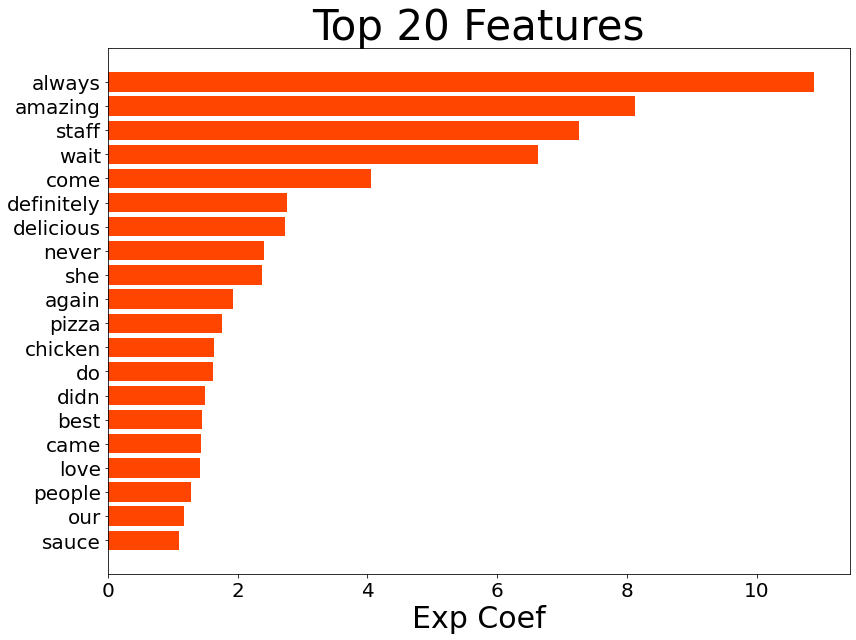

In [48]:
weights = coef_df['exp_coef'].head(20).sort_values()
labels = weights.index

plt.figure(figsize=(12,9))
plt.barh(labels, weights, color = '#ff4500')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Exp Coef', fontsize=30)
plt.title(f'Top 20 Features', fontsize=42)
plt.tight_layout()

In [12]:
df_wtext['is_open'].mean()
#Checking the baseline.  The model doesn't do as well as the baseline.  

0.68708

In [87]:
import seaborn as sns

This heatmap includes dummies for individual average star values.  

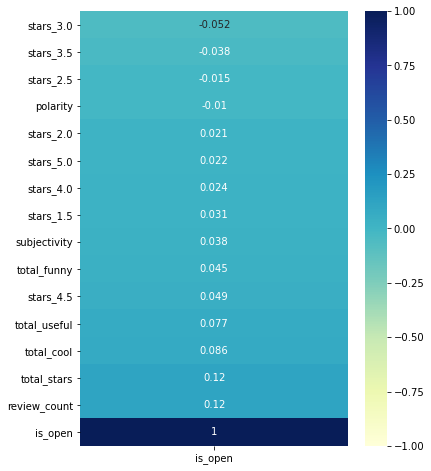

In [8]:
plt.figure(figsize=(6, 8))
sns.heatmap(df_wtext.corr()[['is_open']].sort_values('is_open'),
           annot=True, 
           cmap='YlGnBu', 
           vmin=-1, 
           vmax=1)
#visualizing corellation.  

The heatmap below does not have dummy columns of individual star averages.  

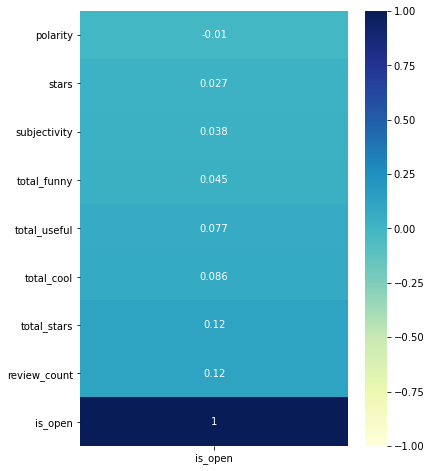

In [88]:
plt.figure(figsize=(6, 8))
sns.heatmap(df_wtext.corr()[['is_open']].sort_values('is_open'),
           annot=True, 
           cmap='YlGnBu', 
           vmin=-1, 
           vmax=1)
#visualizing corellation.  

In [42]:
df_wtext.city.nunique()

737

In [45]:
df_wtext.state.nunique()

23

In [46]:
df_wtext.head(2)

,business_id,name,city,state,stars,review_count,is_open,categories,total_stars,total_useful,total_funny,total_cool,polarity,subjectivity,text
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,Calgary,AB,4.0,27,1,"Restaurants, Mexican",118,20,1,16,0.220185,0.529741,I just love this little Mexican cafeteria-styl...
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,Richmond Hill,ON,3.0,55,1,"Chinese, Restaurants",164,95,31,36,0.142856,0.507534,Great selection of authentic Chinese dishes. T...


In [40]:
X = df_wtext.drop(columns = ['business_id', 'name', 'city', 'state', 'categories', 'is_open', 'text', 'total_useful', 'total_funny', 'total_cool'])
y = df_wtext['is_open']
#setting up X and y columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit(X_test)
pca = PCA(random_state=42)
pca.fit(X_train_sc)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)


In [42]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {np.round(var_exp[:20],3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {np.round(cum_var_exp[:20],3)}')
#Looking at PCA with dummy columns.  

Explained variance (first 20 components): [0.458 0.335 0.16  0.045 0.001]

Cumulative explained variance (first 20 components): [0.458 0.793 0.953 0.999 1.   ]


In [44]:
pca = PCA(n_components = 3, random_state = 42)

# Fit PCA to training data.
pca.fit(X_train)
lr = LogisticRegression()

# Transform Z_train and Z_test.
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

# Fit on Z_train.
lr.fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(lr.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(lr.score(Z_test, y_test),4)}')

Training Score: 0.6867
Testing Score: 0.6882


In [45]:
import statsmodels as sm


In [64]:
#X = sm.add_constant(X)
model = sm.discrete.discrete_model.Logit(y, X).fit()


Optimization terminated successfully.
         Current function value: 0.598821
         Iterations 7


In [48]:
c#Checking P values.  

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_open   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49991
Method:                           MLE   Df Model:                            8
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                 0.03665
Time:                        10:05:09   Log-Likelihood:                -29932.
converged:                       True   LL-Null:                       -31071.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5722      0.135     -4.225      0.000      -0.838      -0.307
stars            0.1472      0.019      7.554      0.000       0.109       0.185
review_count     0.0092      0.001      9.894      0.000       0.007       0.011
total_stars     -0.0002      0.000     -0.737      0.461      -0.001       0.000
total_useful    -0.0027      0.000     -8.851      0.000      -0.003      -0.002
total_funny     -0.0061      0.001    -11.407      0.000      -0.007      -0.005
total_cool       0.0033      0.000      7.132      0.000       0.002       0.004
polarity        -2.2494      0.164    -13.717      0.000      -2.571      -1.928
subjectivity     1.8208      0.245      7.443      0.000       1.341       2.300
================================================================================
"""

In [65]:
model.summary() #without total_stars


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_open   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49993
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                 0.03636
Time:                        10:08:39   Log-Likelihood:                -29941.
converged:                       True   LL-Null:                       -31071.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
stars            0.1220      0.018      6.740      0.000       0.087       0.157
review_count     0.0086      0.000     30.634      0.000       0.008       0.009
total_useful    -0.0026      0.000     -8.983      0.000      -0.003      -0.002
total_funny     -0.0061      0.001    -11.982      0.000      -0.007      -0.005
total_cool       0.0033      0.000      7.931      0.000       0.002       0.004
polarity        -2.0234      0.154    -13.151      0.000      -2.325      -1.722
subjectivity     0.8673      0.086     10.102      0.000       0.699       1.036
================================================================================
"""

In [85]:
np.exp(0.1220)

1.1297541017803188

Each star represents a 13% increase in odds the restaurant is open.  (all else being constant)

In [80]:
np.exp(0.0086)

1.008637086237646

For each review a .8% increase in odds of being open.  

In [81]:
np.exp(-0.0026)

0.9974033770725698

In [82]:
np.exp(-0.0061)

0.993918567227454

In [83]:
np.exp(0.0033)

1.0033054509944446

In [68]:
np.exp(-2.0234)

0.13220520237919386

87% decrease in odds of being open for every increased point in polarity

In [69]:
np.exp(0.8673)

2.3804748866848437

As subjectivity increases, odds of being open is 2.3 times higher.  

In [130]:
df_wtext['polarity'].mean()

0.18002064975317913

In [131]:
df_wtext['subjectivity'].mean()

0.550005137262014